In [7]:
#Центральная предельная теорема
#В качестве непрерывного распределения выбрано Бета-распределение

#Автор: Эль Сабаяр Шевченко Нидаль
#Санкт-Петербург, 2018

from math import sqrt
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
from scipy.stats import norm
%matplotlib inline

In [8]:
#Определяем параметры alpha и beta для бета-распределения
a,b =  2.34,3.879
rv_beta = beta(a,b)

Text(0.5,1,'Beta PDF')

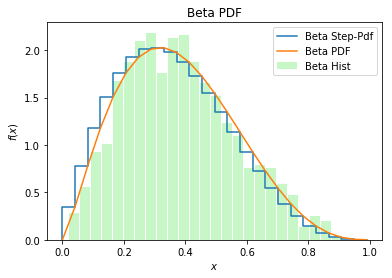

In [9]:
#Сгенерировать из него выборку объёма 1000, построить гистограмму выборки и 
#нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины
vyborka = rv_beta.rvs(size=1000)
left = 0.0
right = 0.99
x = np.linspace(left,right,25)
pdf = rv_beta.pdf(x)
plt.step(x,pdf,label='Beta Step-Pdf')
plt.plot(x,pdf,label='Beta PDF')
plt.hist(vyborka,density=True,bins=25,color='lightgreen',alpha=0.5,label='Beta Hist',rwidth=0.91)


plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend(loc='upper right')
plt.title('Beta PDF')

Text(0,0.5,'$f(x)$')

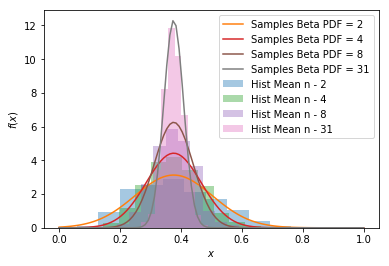

In [6]:
#Оценить распределение выборочного среднего случайной величины при разных объёмах выборок;
#При трёх и более значениях n сгенерировать 1000 выборок объёма n;

def beta_to_normal_approx(n,mu,sigma):
    values = np.array([rv_beta.rvs(n) for x in range(1000)])
    mean_vals = values.mean(axis = 1)
    
    #Постройть гистограммы распределений их выборочных средних;
    plt.hist(mean_vals, density=True, alpha=0.4, label='Hist Mean n - %s' % n)
    
    #Наносим нормальное распределение
    norm_rv = norm(mu,sigma)
    x = np.linspace(0,1,100)
    pdf = norm_rv.pdf(x)
    plt.plot(x,pdf,label='Samples Beta PDF = %s' % str(n))
    plt.legend()

#Параметр среднего для нормального распределения
mu = rv_beta.mean()

#Список значений n
list_nSamples = [2,4,8,31]

for nSamples in list_nSamples:
    #Параметр сигма для нормального распределения
    sigma = sqrt(rv_beta.var()/nSamples)
    beta_to_normal_approx(nSamples,mu,sigma)
    
plt.xlabel('$x$')
plt.ylabel('$f(x)$')

In [ ]:
#Вывод
#Распределение выборочных средних для функции плотности хорошо описывается нормальным распределением;
#С ростом N точность аппроксимации увеличивается.